In [49]:
import numpy as np
import skccm as ccm
import skccm.data as data
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
#%matplotlib inline
from skccm.utilities import train_test_split
import pyEDM as ed
import pandas as pd

In [50]:
rx1 = 3.72 #determines chaotic behavior of the x1 series
rx2 = 3.72 #determines chaotic behavior of the x2 series
b12 = 0.2 #Influence of x1 on x2
b21 = 0.01 #Influence of x2 on x1
ts_length = 1000
x1,x2 = data.coupled_logistic(rx1,rx2,b12,b21,ts_length)

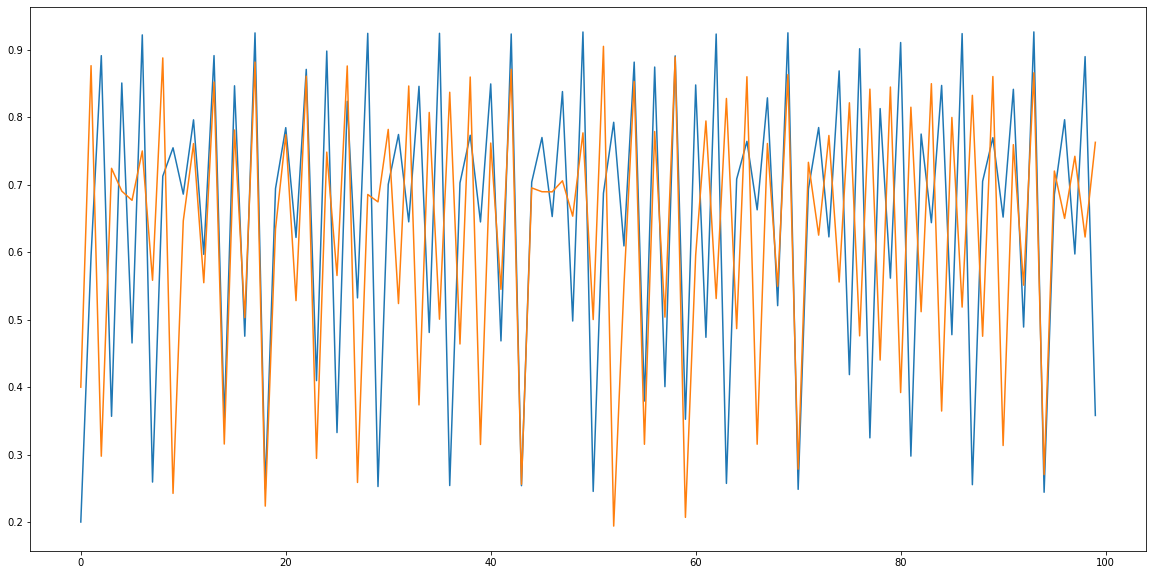

In [51]:
plt.plot(np.arange(len(x1[:100])),x1[:100],np.arange(len(x2[:100])),x2[:100])

In [25]:
df = pd.DataFrame({"x0":x1, "x1":x1,"x2":x2})

In [44]:
r = ed.EmbedDimension( dataFrame = df, lib = "10 1000", pred = "201 500", columns = "x1", target = "x1", showPlot=False) 

In [52]:
lag = 1
embed = 2
e1 = ccm.Embed(x1)
e2 = ccm.Embed(x2)
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

In [53]:
#split the embedded time series
x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

CCM = ccm.CCM() #initiate the class

#library lengths to test
len_tr = len(x1tr)
lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')
#lib_lens = [10,20]

#test causation
CCM.fit(x1tr,x2tr)
x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)

sc1,sc2 = CCM.score()

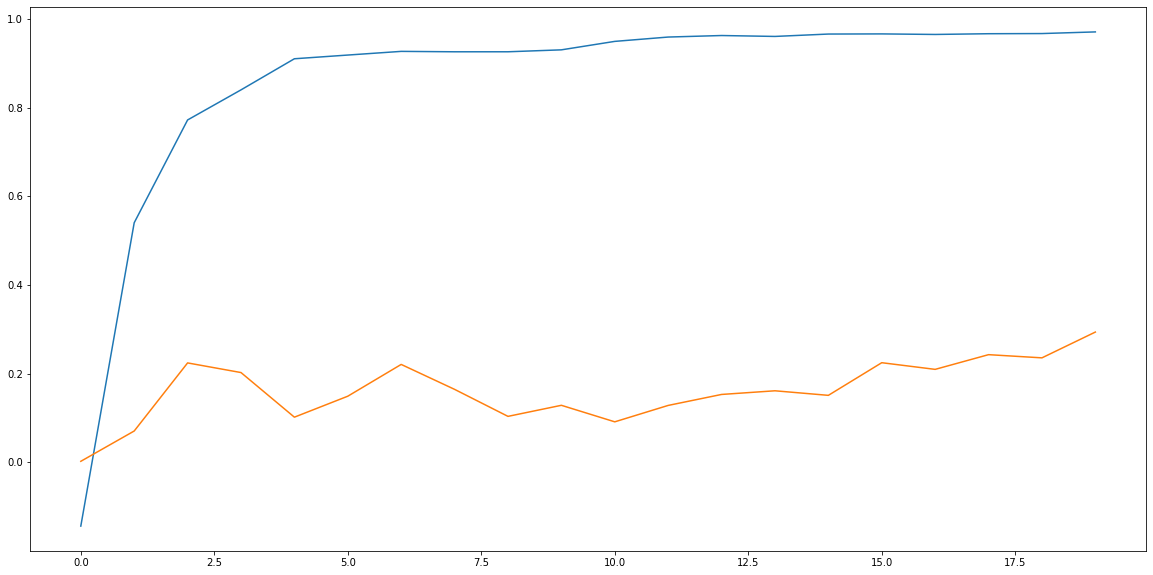

In [54]:
plt.plot(np.arange(len(sc1)),sc1,np.arange(len(sc1)),sc2)

In [55]:
lib_lens

array([ 10,  47,  84, 121, 158, 195, 232, 269, 306, 343, 380, 417, 454,
       491, 528, 565, 602, 639, 676, 713])

In [27]:
sc1[-1]

0.9711870036496892

In [46]:
def CCM_calculator(x1, x2, lag = 1, epsilon = 0.05):
    df = pd.DataFrame({"x0":x1, "x1":x1,"x2":x2})
    r = ed.EmbedDimension( dataFrame = df, lib = "10 1000", pred = "201 500", columns = "x1", target = "x1", showPlot=False) 
    embed = int(r["E"][r["rho"].iloc[1:].idxmax()])
    e1 = ccm.Embed(x1)
    e2 = ccm.Embed(x2)
    X1 = e1.embed_vectors_1d(lag,embed)
    X2 = e2.embed_vectors_1d(lag,embed)
    
    #split the embedded time series
    x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

    CCM = ccm.CCM() #initiate the class

    #library lengths to test
    len_tr = len(x1tr)
    lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')
    #lib_lens = [10,20]

    #test causation
    CCM.fit(x1tr,x2tr)
    x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)

    sc1,sc2 = CCM.score()
    
    return((1-sc1[-1])<epsilon)

In [48]:
CCM_calculator(x1, x2)

True